Principal Component Analysis


Problem1: 
a.Apply PCA on CC dataset.
b. Apply k-means algorithm on the PCA result and report your observation if the silhouette score has improved or not?

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv('/Users/chandanakatta/Downloads/datasets/CC.csv')

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.shape

(8950, 18)

In [4]:
df['CUST_ID'].value_counts()

C10001    1
C16135    1
C16129    1
C16130    1
C16131    1
         ..
C13065    1
C13064    1
C13063    1
C13062    1
C19190    1
Name: CUST_ID, Length: 8950, dtype: int64

In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df=df.fillna(df.mean())

In [7]:
X = df.drop('CUST_ID',axis=1).values
y = df['CUST_ID']
type(X)

numpy.ndarray

In [8]:
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['CUST_ID']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,CUST_ID
0,-4326.383956,921.566884,C10001
1,4118.916676,-2432.846347,C10002
2,1497.907660,-1997.578692,C10003
3,1394.548556,-1488.743450,C10004
4,-3743.351874,757.342659,C10005


In [9]:
X = finalDf.drop('CUST_ID',axis=1).values
y = finalDf['CUST_ID'].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

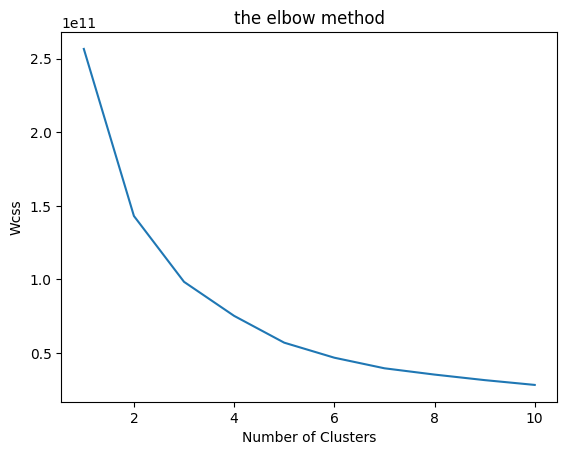

In [12]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [13]:
from sklearn.cluster import KMeans
nclusters = 4 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X)

KMeans(n_clusters=4)

In [14]:
y_cluster_kmeans = km.predict(X)
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
print('Silhouette score after PCA:',score)

Silhouette score after PCA: 0.5072216729988127


Problem1: 
c.Scaling+PCA+K-Means and report performance.

In [15]:
scaler = StandardScaler()
X_Scale = scaler.fit_transform(X)

In [16]:
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X_Scale)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['CUST_ID']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,CUST_ID
0,-0.946949,0.329805,C10001
1,0.901539,-0.870653,C10002
2,0.327859,-0.714882,C10003
3,0.305236,-0.532783,C10004
4,-0.819337,0.271034,C10005


In [17]:
X = finalDf.drop('CUST_ID',axis=1).values
y = finalDf['CUST_ID'].values

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

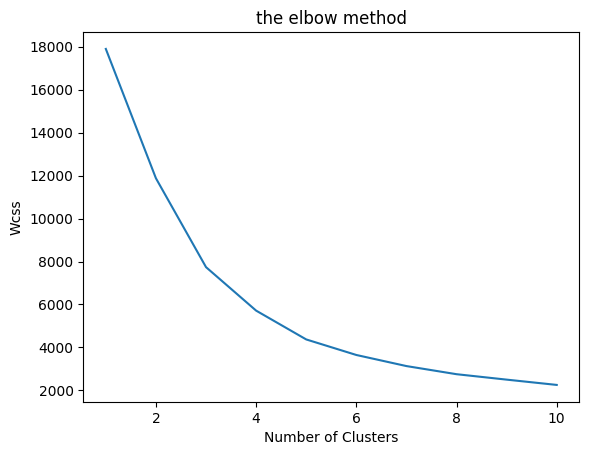

In [19]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()


In [20]:
nclusters = 4 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X)

KMeans(n_clusters=4)

In [21]:
y_cluster_kmeans = km.predict(X)
from sklearn import metrics
score = metrics.silhouette_score(X, y_cluster_kmeans)
print('Silhouette score after scaling and PCA:',score)

Silhouette score after scaling and PCA: 0.5743139880424231


Problem2:
Use pd_speech_features.csv
a. Perform Scaling
b. Apply PCA (k=3)
c. Use SVM to report performance

In [22]:
df = pd.read_csv('/Users/chandanakatta/Downloads/datasets/pd_speech_features.csv')

df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [23]:
df.shape

(756, 755)

In [24]:
# check for missing values in variables

df.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [25]:
df['gender'].value_counts()

1    390
0    366
Name: gender, dtype: int64

In [26]:
#feature vector and target variable 
X = df.drop('gender',axis=1)
y = df['gender']
type(X)

pandas.core.frame.DataFrame

In [27]:
scaler = StandardScaler()
X_Scale = scaler.fit_transform(X)

In [28]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_Scale)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2','principal component 3'])

finalDf = pd.concat([principalDf, df[['gender']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,principal component 3,gender
0,-10.019268,1.489764,-6.843562,1
1,-10.607178,1.606562,-6.827351,1
2,-13.503983,-1.209671,-6.804751,1
3,-9.177658,9.024409,15.250442,0
4,-6.815990,4.780522,15.607612,0


In [29]:
X = finalDf.drop('gender',axis=1).values
y = finalDf['gender'].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((604, 3), (152, 3))

In [31]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score is {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

X_train, X_test, y_train, y_test = train_test_split(X_Scale,y, test_size=0.3,random_state=0)

svc = SVC(max_iter=1000)

svc.fit(X_train, y_train)

Y_pred = svc.predict(X_test)

acc_svc = svc.score(X_train, y_train)
acc_svc1 = svc.score(X_test, y_test)

print("Training set accuracy score is ", acc_svc)
print('Test set score is',acc_svc1)



Model accuracy score is 0.8684
Training set accuracy score is  0.9697542533081286
Test set score is 0.8898678414096917


Problem3. 
Apply Linear Discriminant Analysis (LDA) on Iris.csv dataset to reduce dimensionality of data to k=2.

In [39]:

import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [40]:

df = pd.read_csv('/Users/chandanakatta/Downloads/datasets/Iris.csv')
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(df.iloc[:,range(0,4)].values)

In [42]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['Species'].values)

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std,y)
print('Rows and columns of original data is ',X_train_std.shape)
print('After LDA dimension reduction row , columns is' ,X_train_lda.shape)

Rows and columns of original data is  (150, 4)
After LDA dimension reduction row , columns is (150, 2)


In [44]:
data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]



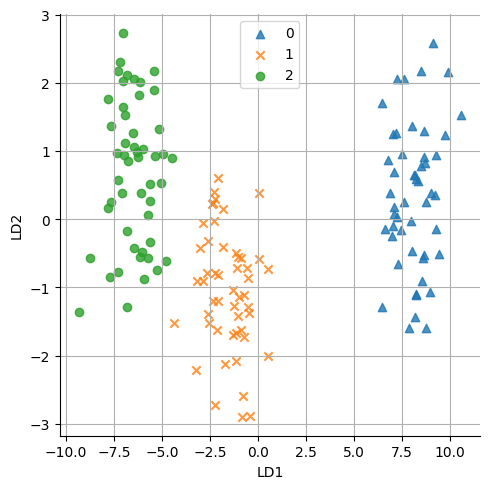

In [45]:
markers = ['^', 'x', 'o']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers, fit_reg=False, legend=False)
plt.legend(loc='upper center')
plt.grid()
plt.tight_layout
plt.show()

In [46]:
pca2 = PCA(n_components=2)
principalComponents = pca2.fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, df[['Species']]], axis = 1)
finalDf.head()


,principal component 1,principal component 2,Species
0,-10.019268,1.489764,Iris-setosa
1,-10.607178,1.606562,Iris-setosa
2,-13.503983,-1.209671,Iris-setosa
3,-9.177658,9.024409,Iris-setosa
4,-6.815990,4.780522,Iris-setosa


In [47]:
principalDf.shape

(756, 2)

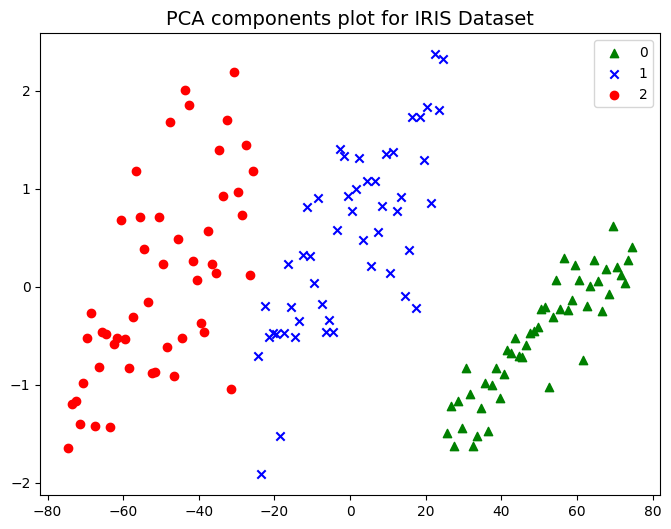

In [48]:
X_pca = pca.fit(df.iloc[:, 0:4]).transform(df.iloc[:, 0:4])

plt.figure(figsize=(8,6))
 
plt.scatter(X_pca[0:50,0], X_pca[0:50,1], color='green', marker='^', label='0')
plt.scatter(X_pca[50:100,0], X_pca[50:100,1], color='blue', marker='x', label='1')
plt.scatter(X_pca[100:150,0], X_pca[100:150,1], color='red', marker='o', label='2')
 
plt.title("PCA components plot for IRIS Dataset", fontsize=14)
plt.legend()
plt.show()

4.Briefly identify the difference between PCA and LDA

Both PCA transformation and LDA transformation resulted in clear separation of IRIS dataset .
LDA is a supervisied learning algorithm whereas PCA is unsupervised learning algorithm. 


PCA, LDA both are for dimensionality reduction. LDA is better for classification – that is, when you have labels for your data points and want to predict which label new points will have based on feature values . To find patterns in data, then PCA will likely work better .
